<a href="https://colab.research.google.com/github/sahanashetty31/EIP-4.0/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


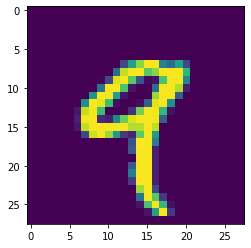

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Convolution2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Convolution2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Convolution2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Convolution2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model[j].summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_99 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_100 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_101 (Bat (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_43 (Dropout)         (None, 12, 12, 32)      

In [12]:
model[j].compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model[j].fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/20
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1756 - acc: 0.9462
Epoch 2/20
60000/60000 [==============================] - 314s 5ms/step - loss: 0.0703 - acc: 0.9790
Epoch 3/20
60000/60000 [==============================] - 317s 5ms/step - loss: 0.0569 - acc: 0.9825
Epoch 4/20
60000/60000 [==============================] - 317s 5ms/step - loss: 0.0489 - acc: 0.9855
Epoch 5/20
60000/60000 [==============================] - 318s 5ms/step - loss: 0.0412 - acc: 0.9877
Epoch 6/20
60000/60000 [==============================] - 320s 5ms/step - loss: 0.0369 - acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 318s 5ms/step - loss: 0.0314 - acc: 0.9903
Epoch 8/20
60000/60000 [==============================] - 315s 5ms/step - loss: 0.0302 - acc: 0.9911
Epoch 9/20
60000/60000 [==============================] - 317s 5ms/step - loss: 0.0276 - acc: 0.9918
Epoch 10/20
60000/60000 [==============================] - 313s 5ms/step - loss: 0.0251 -

In [0]:
score = model[j].evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.015810231621237653, 0.9955]


In [0]:
y_pred = model[j].predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[8.52913573e-11 5.34757172e-09 7.25027007e-08 4.85279417e-09
  2.20752856e-08 2.52372168e-09 9.68684855e-11 9.99999881e-01
  1.61391300e-09 1.40039917e-08]
 [1.26472814e-08 7.25934379e-09 9.99999881e-01 3.37377126e-09
  1.80790813e-08 1.15065661e-12 6.04794508e-08 2.28699615e-09
  1.50244333e-08 1.14646759e-09]
 [5.65909319e-09 9.99995708e-01 1.99074748e-08 7.38231387e-09
  2.86218551e-08 1.25733948e-07 2.60554771e-06 1.51024062e-06
  2.56904489e-08 7.74028841e-09]
 [9.99998808e-01 9.14445408e-10 1.19519230e-08 1.65144287e-10
  7.37666039e-10 9.09920583e-09 1.16527769e-06 2.09097584e-09
  2.21666081e-08 1.46418955e-09]
 [4.35461533e-09 3.34709171e-07 2.22757546e-09 2.98700642e-09
  9.99997854e-01 3.36058754e-08 6.32721182e-08 1.36164813e-09
  1.06082076e-09 1.68989664e-06]
 [5.13890153e-10 9.99999762e-01 7.58262075e-09 8.62148408e-10
  8.60355076e-09 3.16556448e-09 2.39475977e-08 2.69215036e-07
  3.71797793e-09 5.43801315e-09]
 [1.58174168e-10 9.68739329e-08 5.69667924e-10 6.06710293e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model[j].layers])

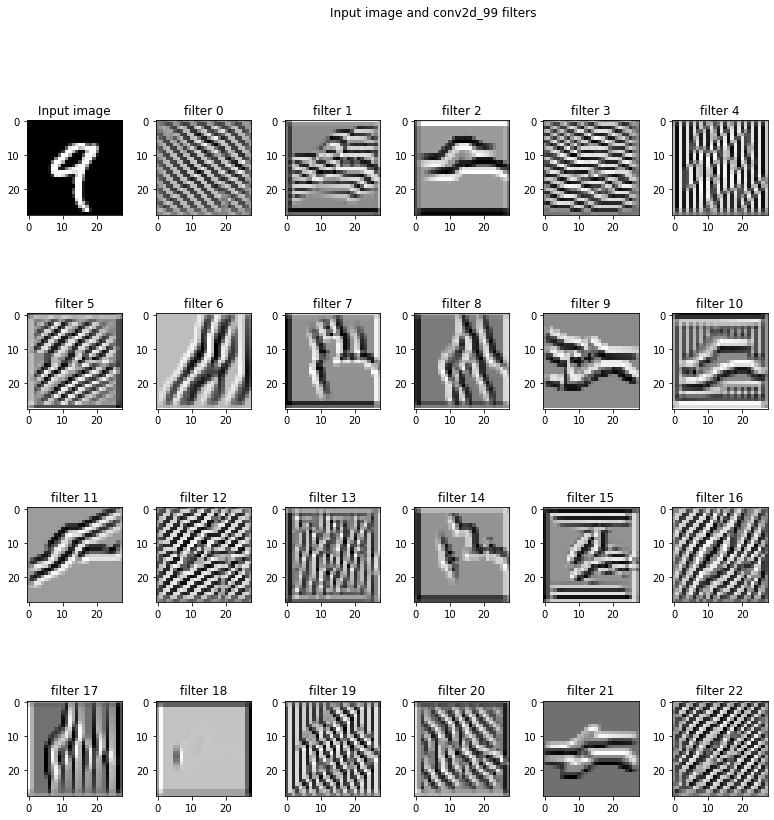

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),
                      layer_name = 'conv2d_99'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model[j].input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model[j].input], [loss, grads])

        # step size for gradient ascent
        step = 5

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
        
vis_img_in_filter()